In [13]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_usd: float
    target_currency: Literal['EUR', 'INR']
    total_usd: float
    total_inr: float
    total_eur: float

In [14]:
def calc_total(state: PortfolioState) -> PortfolioState:
    """
    Add the interest to the total amount in USD.
    """
    state['total_usd'] = state['amount_usd'] * 1.08 
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    """
    Convert the total amount in USD to INR.
    """
    state['total_inr'] = state['total_usd'] * 85.0
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    """
    Convert the total amount in USD to EUR.
    """
    state['total_inr'] = state['total_usd'] * 0.92
    return state

def choose_conversion(state: PortfolioState) -> str:
   return state["target_currency"]

In [15]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("Calc_total_node",calc_total)
builder.add_node("Calc_total_inr_node",convert_to_inr)
builder.add_node("Calc_total_eur_node",convert_to_eur)

builder.add_edge(START, "Calc_total_node")
builder.add_conditional_edges(
    "Calc_total_node", 
    choose_conversion, 
    {
        'EUR': "Calc_total_eur_node",
        'INR': "Calc_total_inr_node"
    }
)
builder.add_edge(["Calc_total_inr_node", "Calc_total_eur_node"], END)

graph = builder.compile()


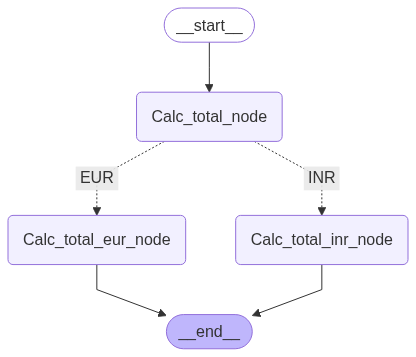

In [16]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
graph.invoke({"amount_usd": 1000.0, "target_currency": "EUR"})

{'amount_usd': 1000.0,
 'target_currency': 'EUR',
 'total_usd': 1080.0,
 'total_inr': 993.6}